In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_columns', 100)
sns.set_style("whitegrid")
my_pal = sns.color_palette(n_colors = 10)

In [2]:
train = pd.read_csv("C:\\temp\\Data Science\\Kaggle\\Data Science Bowl\\train.csv")
train_labels = pd.read_csv('C:\\temp\\Data Science\\Kaggle\\Data Science Bowl\\train_labels.csv')
test = pd.read_csv('C:\\temp\\Data Science\\Kaggle\\Data Science Bowl\\test.csv') 
specs = pd.read_csv('C:\\temp\\Data Science\\Kaggle\\Data Science Bowl\\specs.csv')
ss = pd.read_csv('C:\\temp\\Data Science\\Kaggle\\Data Science Bowl\\sample_submission.csv')


In [3]:
ss.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


In [4]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


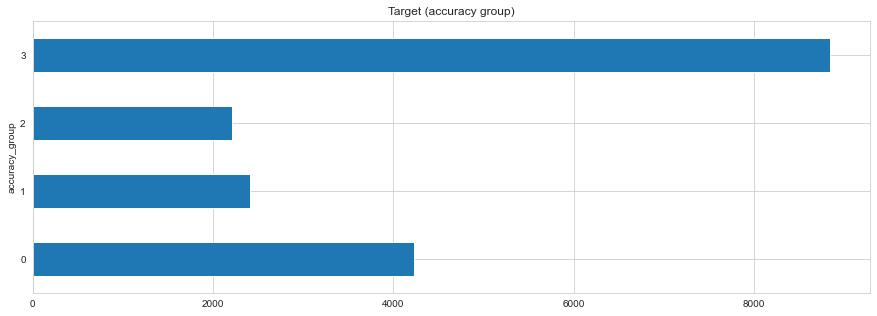

In [5]:
train_labels.groupby('accuracy_group')['game_session'].count().plot(kind = 'barh', figsize = (15, 5), title ='Target (accuracy group)')
plt.show()

C:\Users\TauseefA\Anaconda3\envs\Py37\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\TauseefA\Anaconda3\envs\Py37\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\TauseefA\Anaconda3\envs\Py37\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\TauseefA\Anaconda3\envs\Py37\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\TauseefA\Anaconda3\envs\Py37\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\TauseefA\Anacond

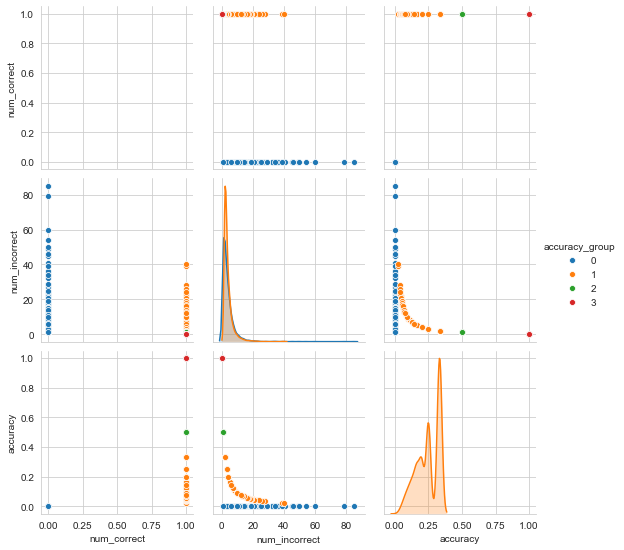

In [6]:
sns.pairplot(train_labels, hue='accuracy_group')
plt.show()

In [7]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [ ]:
# Event_id and game_session

In [8]:
# timestamp
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   event_id         object
 1   game_session     object
 2   timestamp        object
 3   event_data       object
 4   installation_id  object
 5   event_count      int64 
 6   event_code       int64 
 7   game_time        int64 
 8   title            object
 9   type             object
 10  world            object
dtypes: int64(3), object(8)
memory usage: 951.8+ MB


In [10]:
# Convert train[timestamp] column to datetime format
train['timestamp'] = pd.to_datetime(train['timestamp'])

In [11]:
# Extract date, hour and day of the week from train[timestamp]
train['date'] = train['timestamp'].dt.date
train['hour'] = train['timestamp'].dt.hour
train['weekday_name'] = train['timestamp'].dt.day_name()

In [12]:
# Convert test[timestamp] column to datetime format
test['timestamp'] = pd.to_datetime(test['timestamp'])

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156414 entries, 0 to 1156413
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   event_id         1156414 non-null  object             
 1   game_session     1156414 non-null  object             
 2   timestamp        1156414 non-null  datetime64[ns, UTC]
 3   event_data       1156414 non-null  object             
 4   installation_id  1156414 non-null  object             
 5   event_count      1156414 non-null  int64              
 6   event_code       1156414 non-null  int64              
 7   game_time        1156414 non-null  int64              
 8   title            1156414 non-null  object             
 9   type             1156414 non-null  object             
 10  world            1156414 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 97.1+ MB


In [14]:
# Extract date, hour and day from test[timestamp] and add as new columns in test
test['date'] = test['timestamp'].dt.date
test['hour'] = test['timestamp'].dt.hour
test['weekday_name'] = test['timestamp'].dt.day_name()

In [33]:
test.tail()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name
1156409,c74f40cd,46ff9d3ad2be09f2,2019-09-28 21:20:40.918000+00:00,"{""description"":""Alright! This one is the littl...",ffe774cc,39,3121,32030,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-09-28,21,Saturday
1156410,6c930e6e,46ff9d3ad2be09f2,2019-09-28 21:20:41.493000+00:00,"{""duration"":20008,""misses"":0,""event_count"":40,...",ffe774cc,40,2030,32584,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-09-28,21,Saturday
1156411,a5be6304,46ff9d3ad2be09f2,2019-09-28 21:20:45.499000+00:00,"{""session_duration"":36607,""exit_type"":""game_co...",ffe774cc,41,2010,36607,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,2019-09-28,21,Saturday
1156412,27253bdc,96d7dc31e822cedc,2019-09-28 21:21:05.670000+00:00,"{""event_code"": 2000, ""event_count"": 1}",ffe774cc,1,2000,0,Tree Top City - Level 3,Clip,TREETOPCITY,2019-09-28,21,Saturday
1156413,f56e0afc,6897df1e7b5ccdf7,2019-09-28 21:21:56.105000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",ffe774cc,1,2000,0,Bird Measurer (Assessment),Assessment,TREETOPCITY,2019-09-28,21,Saturday


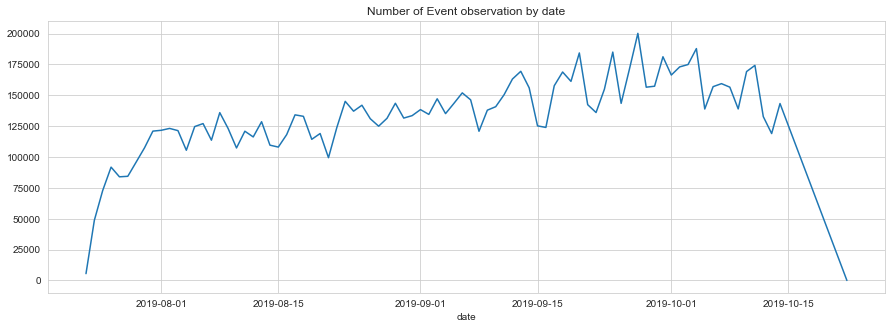

In [15]:
# Plot number of events per date
train.groupby('date')['event_id'].agg('count').plot(figsize = (15, 5), title = 'Number of Event observation by date')
plt.show()

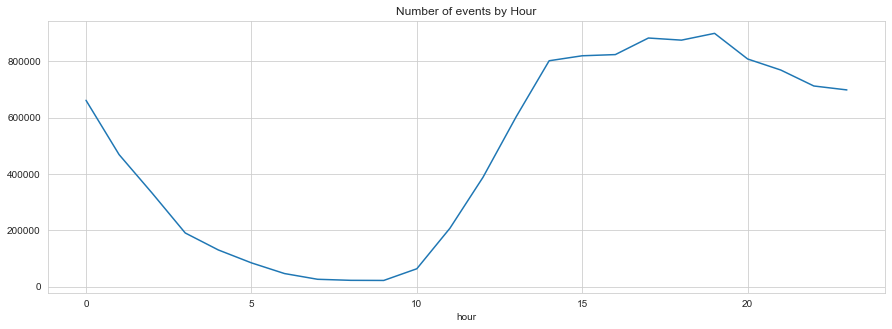

In [46]:
#Plot number of event by Hour

train.groupby('hour')['event_id'].agg('count').plot(figsize = (15, 5), title = 'Number of events by Hour')
plt.show()

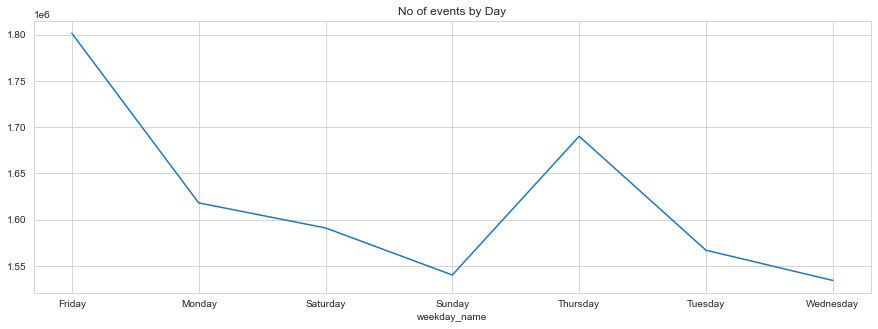

In [16]:
# Plot number of events by day of the week

train.groupby('weekday_name')['event_id'].agg('count').plot(figsize = (15, 5), title = 'No of events by Day')
plt.show()

In [17]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,17,Friday
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,17,Friday
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,Friday
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,Friday
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,Friday


In [18]:
train['installation_id'].nunique()

17000

In [19]:
# Groupby instllation date - Filter event id before doing count on every column - Better performance
train.groupby('installation_id')['event_id'].count()

installation_id
0001e90f    1357
000447c4     181
0006a69f    3801
0006c192    2224
0009a5a9     412
            ... 
fff64664     779
fff70c1e      44
fff744ce       3
fff944d5     173
fffc0583     251
Name: event_id, Length: 17000, dtype: int64

In [20]:
# Groupby instllation date - Filter event id after doing count on every column - Degraded performance
train.groupby('installation_id').count()['event_id']

installation_id
0001e90f    1357
000447c4     181
0006a69f    3801
0006c192    2224
0009a5a9     412
            ... 
fff64664     779
fff70c1e      44
fff744ce       3
fff944d5     173
fffc0583     251
Name: event_id, Length: 17000, dtype: int64

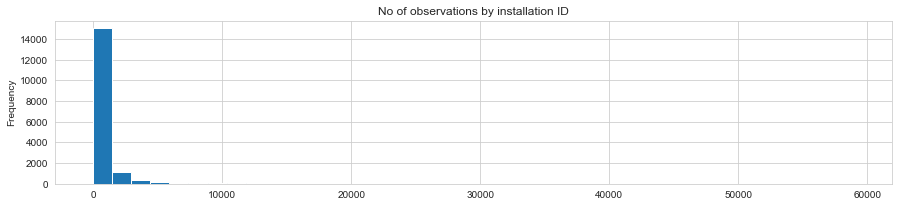

In [21]:
train.groupby('installation_id')['event_id'].count().plot(kind = 'hist', bins=40, figsize = (15, 3), title = 'No of observations by installation ID')

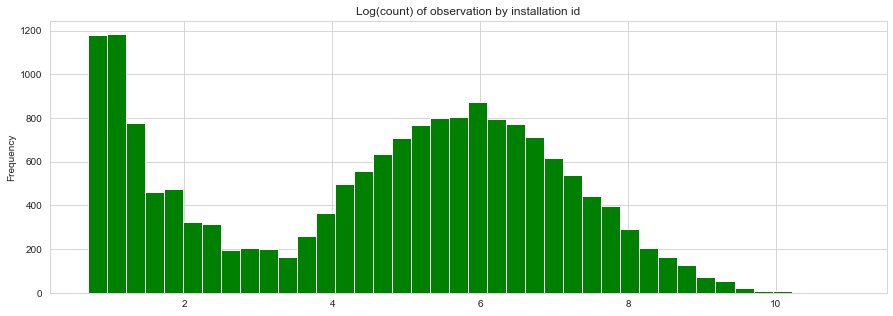

In [22]:
# Log transform count by installation ID

train.groupby('installation_id')['event_id'].count().apply(np.log1p).plot(kind = 'hist', bins = 40, color = 'green', figsize = (15, 5), title = 'Log(count) of observation by installation id')

In [23]:
# Installatino IDs - Highest counts

train.groupby('installation_id')['event_id'].count().sort_values(ascending=False).head()

installation_id
f1c21eda    58988
4d7d3d97    32749
d25338cb    31826
cff5a334    30918
c9ea32e9    30402
Name: event_id, dtype: int64

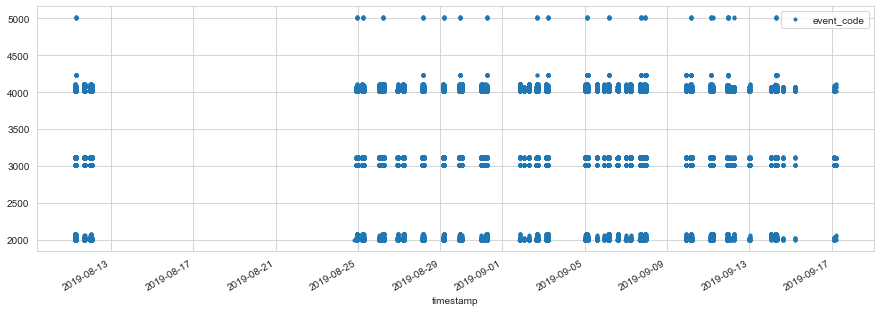

In [24]:
train.query('installation_id == "f1c21eda"').set_index('timestamp')[['event_code']] \
.plot(figsize =(15, 5),
     style = '.')
plt.show()

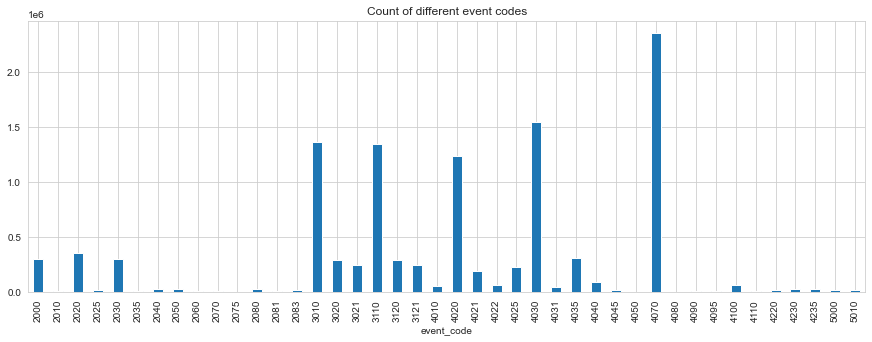

In [27]:
# Event Code

train.groupby('event_code')['event_id'].count().plot(kind = 'bar', figsize = (15, 5), title = 'Count of different event codes')

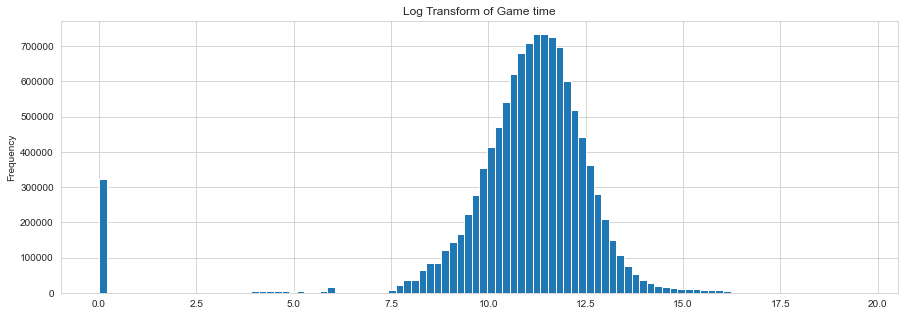

In [33]:
# Game Time

train['game_time'].apply(np.log1p).plot(kind = 'hist', figsize = (15, 5), bins = 100, title = 'Log Transform of Game time')
plt.show()

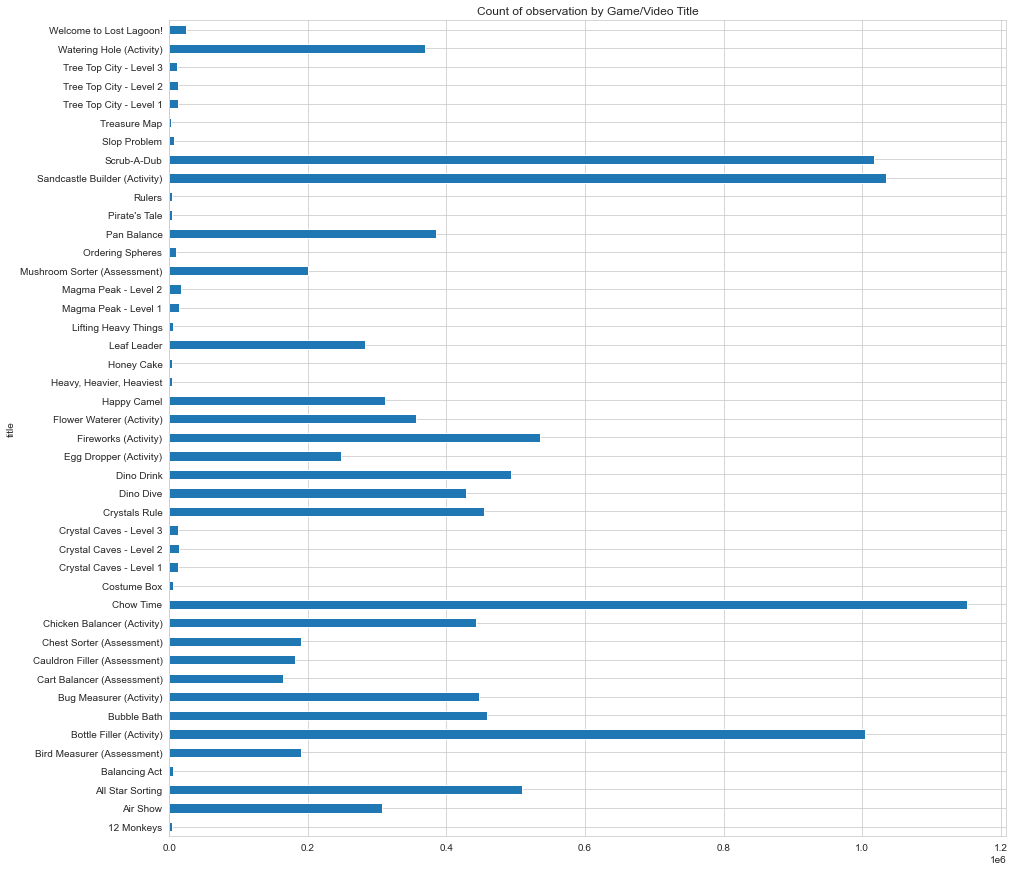

In [42]:
# Game/Video titles
train.groupby('title')['event_id'].count().plot(kind = 'barh', figsize = (15, 15), title = 'Count of observation by Game/Video Title')
plt.show()

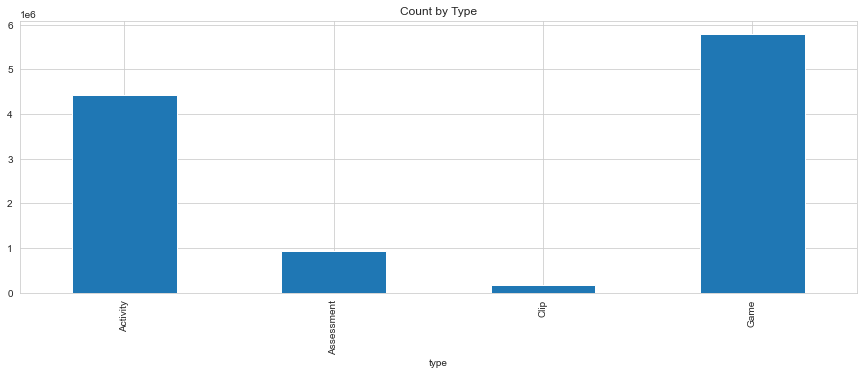

In [48]:
# Game/Vieo Type
train.groupby('type')['event_id'].count().plot(kind = 'bar', figsize = (15, 5), title = 'Count by Type')
plt.show()

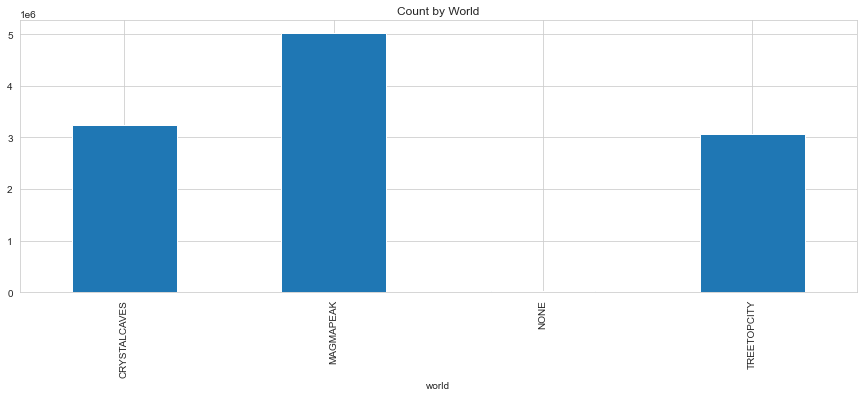

In [56]:
# World
train.groupby('world')['event_id'].count().plot(kind = 'bar', figsize = (15, 5), title = 'Count by World')

In [65]:
# Log(game_time) vs game/video categories

train['log1p_game_time'] = train['game_time'].apply(np.log1p)
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name,log1p_game_time
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,17,Friday,0.000000
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,17,Friday,0.000000
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,Friday,0.000000
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,Friday,3.988984
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,17,Friday,8.849801


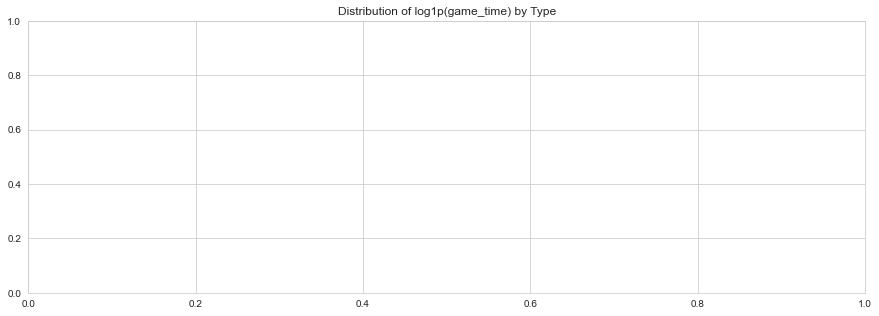

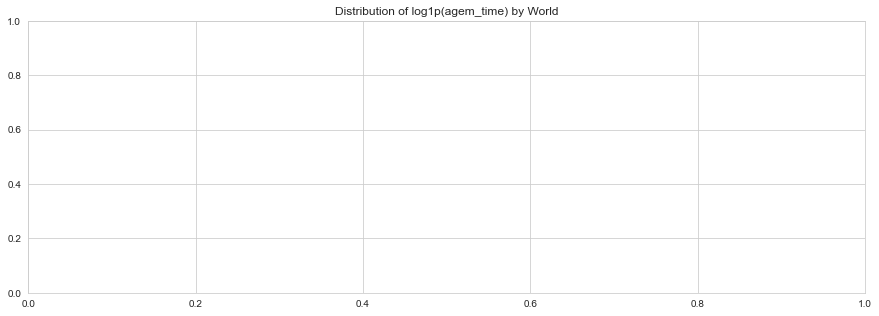

In [64]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.catplot(x='type', y='log1p_game_time', data= train.sample(10000), alpha = 0.5, ax = ax);
ax.set_title('Distribution of log1p(game_time) by Type')
plt.close()
plt.show()

fig, ax = plt.subplots(figsize = (15, 5))
sns.catplot(x='world', y='log1p_game_time', data=train.sample(10000), alpha = 0.5, ax = ax);
ax.set_title('Distribution of log1p(agem_time) by World')
plt.close()
plt.show()

In [68]:
# Specs.csv

specs.describe()

,event_id,info,args
count,386,386,386
unique,386,168,191
top,9554a50b,This event occurs when the player clicks on th...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
freq,1,17,25


In [73]:
# Baseline Model

#First Attempt - still working to fully understand the problem
from sklearn.model_selection import train_test_split

# Define cleared or not cleared

train['cleared'] = True
train.loc[train['event_data'].str.contains('false') & train['event_code'].isin([4100, 4110]), 'cleared'] = False

test['cleared'] = True
test.loc[test['event_data'].str.contains('false') & test['event_code'].isin([4100, 4110]), 'cleared'] = False
aggs = {'hour': ['max', 'min', 'mean'],
       'cleared': ['mean']}

train_aggs = train.groupby('installation_id').agg(aggs)
test_aggs = test.groupby('installation_id').agg(aggs)

train_aggs = train_aggs.reset_index()
test_aggs = test_aggs.reset_index()

train_aggs.columns = ['_'.join(col).strip() for col in train_aggs.columns.values]
test_aggs.columns = ['_'.join(col).strip() for col in test_aggs.columns.values]

train_aggs = train_aggs.rename(columns={'installation_id_': 'installation_id'})


In [74]:
train_aggs.merge(train_labels[['installation_id','accuracy_group']], how='left')

,installation_id,hour_max,hour_min,hour_mean,cleared_mean,accuracy_group
0,0001e90f,18,17,17.733235,1.000000,NaN
1,000447c4,15,14,14.690608,1.000000,NaN
2,0006a69f,20,4,11.927124,0.995527,3.0
3,0006a69f,20,4,11.927124,0.995527,0.0
4,0006a69f,20,4,11.927124,0.995527,3.0
...,...,...,...,...,...,...
31071,fff64664,18,13,15.277279,1.000000,NaN
31072,fff70c1e,9,8,8.068182,1.000000,NaN
31073,fff744ce,21,21,21.000000,1.000000,NaN
31074,fff944d5,21,21,21.000000,1.000000,NaN
